<a href="https://colab.research.google.com/github/EliGorniak/Ocean_DeepLearning_Nov2020/blob/main/Ocean_DeepLearning_nov2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando bibliotecas:
import keras
from keras.datasets import mnist # database de imagens para treino (http://yann.lecun.com/exdb/mnist/)
from tensorflow.python.keras import Sequential # modelo de base da rede neural, uma arquitetura
from tensorflow.python.keras.layers import Dense, Dropout # dense é o neuronio, dropout evita o overfitting (regularizador)
from tensorflow.compat.v1.keras.optimizers import RMSprop # diz pra rede qual é o back propagation

In [2]:
# carregando os dados de treino e teste:
# usando os dados do próprio MNinst
(x_treino, y_treino), (x_teste, y_texte) = mnist.load_data()

In [3]:
# Analisando o database:
# Quantas imagens temos para treino?
print('Quantidade de imagens para treino:', len(x_treino))

# Quantas imagens temos para teste?
print('Quantidade de imagens para teste:', len(x_teste))

# Qual o tipo de x_treino?
print('Tipo do x_treino', type(x_treino))

# Pegando a primeira imagem
primeira_imagem = x_treino[0]
print(primeira_imagem)
representacao_primeira_imagem = y_treino[0]
print('O que a imagem 0 representa:', representacao_primeira_imagem)

# Qual o formato da primeira imagem?
print('Formato da primeira imagem:', primeira_imagem.shape, type(primeira_imagem.shape))


Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo do x_treino <class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 2

Essa imagem representa: 9


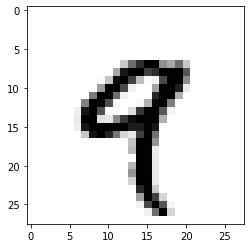

In [4]:
# Exibir as imagens na base de dados:
import matplotlib.pyplot as plt
indice = 4

print('Essa imagem representa:', y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary) #cmap = color map, o mapa de cores
plt.show()

In [5]:
# Achatando as matrizes de pixels e transformando em uma única lista:
quantidade_treino = len(x_treino) # 60000 
quantidade_teste = len(x_teste)# 10000

resolucao_imagem = x_treino[0].shape # (28 pixels X 28 pixels)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

# re-shape - função para mudar o formato de um array
x_treino = x_treino.reshape(quantidade_treino, resolucao_total) #vai fazer o reshape de x_treino
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [6]:
print('Quantidade de itens em x_treino[0]:', len(x_treino[0]))

# como ficou x_treino[0]?
print(x_treino[0])


Quantidade de itens em x_treino[0]: 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 25

In [7]:
# Normalização dos dados - transformando todos os dados entre valores 0 e 1:
# 255 vira 1
# 127 vora 0.5
# 0 vira 0
# e assim por diante

# precisamos garantir que o valor máximo de entrada é 1
# https://www.3blue1brown.com/neural-networks 
# Como atualmente a imagem fornece um valor máximo de 255, precisamos normaliza-los dividindo por 255

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

#transformação de cada um dos elementos para até 1
x_treino /= 255
x_teste /= 255

print(x_treino[0][350], type(x_treino[0][350]))
# NÃO EXECUTAR MAIS DE UMA VEZ!!! OU VAI CONTINUAR DIVIDINDO POR 255....

0.27450982 <class 'numpy.float32'>


In [8]:
# Visualizando os dados agora normalizados
print('DADOS NORMALIZADOS:', x_treino[0])


DADOS NORMALIZADOS: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.

In [ ]:
# 